In [1]:
# import libraries
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Load data

In [3]:
# load data from CSV
survey_data = pd.read_csv('data/Final_Historical_Survey_Data.csv')

In [4]:
# survey_data.to_csv('data/Final_Historical_Survey_Data.csv', index=False)

In [5]:
survey_data.iloc[:,0:20]

,survey_record,employee_id,first_name,last_name,gender,ethnicity,age,team,department,manager_id,role_level,tenure_years,work_arrangement,training_completed,last_promotion_date,survey_date,psychological_safety,dependability,clarity,meaning
0,0,EMP00001,Jennifer,Jones,Female,Indigenous,30,Product,Technology,MGR109,Manager,2.9,Hybrid,Yes,NaN,2025-04-29,67.841974,75.619062,73.200406,82.726549
1,1,EMP00001,Jennifer,Jones,Female,Indigenous,30,Product,Technology,MGR109,Manager,2.9,Hybrid,Yes,NaN,2025-02-01,80.500560,64.951624,68.464597,91.541533
2,2,EMP00001,Jennifer,Jones,Female,Indigenous,30,Product,Technology,MGR109,Manager,2.9,Hybrid,Yes,NaN,2024-10-13,76.462094,80.762322,87.217022,80.555211
3,3,EMP00001,Jennifer,Jones,Female,Indigenous,30,Product,Technology,MGR109,Manager,2.9,Hybrid,Yes,NaN,2024-07-30,83.479002,73.820627,81.205978,71.958522
4,4,EMP00002,Eva,Chaudry,Male,Black,53,Sales,Technology,MGR188,Individual Contributor,4.3,Hybrid,Yes,NaN,2025-04-11,78.756097,86.680632,81.942148,48.201919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,EMP04999,Juan Carlos,Soto,Male,Hispanic,51,HR,Support,MGR085,Individual Contributor,11.6,Remote,Yes,NaN,2024-07-22,67.239230,72.928560,71.123426,65.212839
19996,19996,EMP05000,Annette,Dodd,Female,Mixed,55,Operations,Technology,MGR062,Individual Contributor,1.1,Remote,No,NaN,2025-04-12,65.149591,79.690475,58.160396,71.745595
19997,19997,EMP05000,Annette,Dodd,Female,Mixed,55,Operations,Technology,MGR062,Individual Contributor,1.1,Remote,No,NaN,2025-01-23,89.325638,80.107678,73.428367,79.733627
19998,19998,EMP05000,Annette,Dodd,Female,Mixed,55,Operations,Technology,MGR062,Individual Contributor,1.1,Remote,No,NaN,2024-11-02,82.649322,78.482335,95.576211,77.792976


In [6]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survey_record         20000 non-null  int64  
 1   employee_id           20000 non-null  object 
 2   first_name            20000 non-null  object 
 3   last_name             20000 non-null  object 
 4   gender                20000 non-null  object 
 5   ethnicity             20000 non-null  object 
 6   age                   20000 non-null  int64  
 7   team                  20000 non-null  object 
 8   department            20000 non-null  object 
 9   manager_id            20000 non-null  object 
 10  role_level            20000 non-null  object 
 11  tenure_years          20000 non-null  float64
 12  work_arrangement      20000 non-null  object 
 13  training_completed    20000 non-null  object 
 14  last_promotion_date   4036 non-null   object 
 15  survey_date        

In [7]:
survey_data.iloc[:,15:]

,survey_date,psychological_safety,dependability,clarity,meaning,impact,communication,collaboration,innovation,engagement_score,attrition_risk,qualitative_feedback
0,2025-04-29,67.841974,75.619062,73.200406,82.726549,73.829213,79.204468,84.149772,77.796301,93.489930,Low,Dependability and support from teammates are o...
1,2025-02-01,80.500560,64.951624,68.464597,91.541533,68.529570,75.704261,78.051155,74.334689,84.971012,Medium,Strong sense of meaning and purpose in our pro...
2,2024-10-13,76.462094,80.762322,87.217022,80.555211,81.089070,73.310260,73.465705,83.015441,72.238381,Medium,"Great team collaboration, but clearer goals wo..."
3,2024-07-30,83.479002,73.820627,81.205978,71.958522,62.319297,62.362087,72.414752,57.854884,93.719321,Medium,"Communication has improved, but psychological ..."
4,2025-04-11,78.756097,86.680632,81.942148,48.201919,70.884098,69.032693,78.927838,64.185408,70.899170,Low,"Communication has improved, but psychological ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2024-07-22,67.239230,72.928560,71.123426,65.212839,91.306723,67.993192,70.992276,48.769833,49.362080,Low,Dependability and support from teammates are o...
19996,2025-04-12,65.149591,79.690475,58.160396,71.745595,66.542476,88.305911,72.515193,60.225581,87.293519,Low,"Great team collaboration, but clearer goals wo..."
19997,2025-01-23,89.325638,80.107678,73.428367,79.733627,83.615600,77.836459,74.170243,62.399201,63.400023,Low,Dependability and support from teammates are o...
19998,2024-11-02,82.649322,78.482335,95.576211,77.792976,87.179391,82.555649,69.227978,72.279436,75.767093,Low,Strong sense of meaning and purpose in our pro...


Team-level stats:
  - psychological_safety
  - communication
  - collaboration
  - innovation

In [8]:
# survey_data = survey_data.infer_objects().convert_dtypes()

In [9]:
# survey_data.info()

## Explore data

In [10]:
# count combinations of department and team
survey_data['department_team'] = survey_data['department'] + ' - ' + survey_data['team']
survey_data['department_team'].value_counts().sort_index()


department_team
Business Development - Engineering    704
Business Development - HR             692
Business Development - Marketing      644
Business Development - Operations     664
Business Development - Product        624
Business Development - Sales          696
Innovation - Engineering              596
Innovation - HR                       748
Innovation - Marketing                644
Innovation - Operations               640
Innovation - Product                  620
Innovation - Sales                    688
People - Engineering                  668
People - HR                           616
People - Marketing                    720
People - Operations                   660
People - Product                      668
People - Sales                        736
Support - Engineering                 748
Support - HR                          572
Support - Marketing                   752
Support - Operations                  704
Support - Product                     760
Support - Sales   

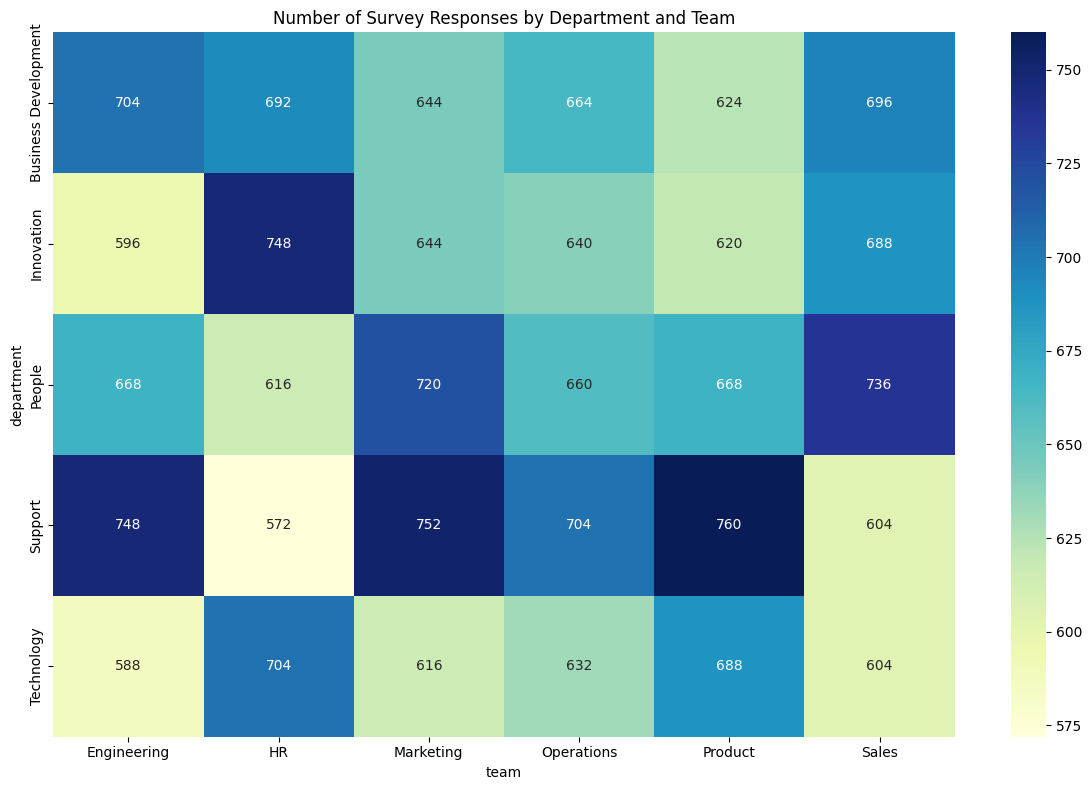

In [11]:
# make a heatmap of the department_team counts
pivot_table = pd.pivot_table(
    survey_data,
    values='survey_record',
    index='department',
    columns='team',
    aggfunc='count'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Survey Responses by Department and Team')
plt.tight_layout()
plt.show()